<a href="https://colab.research.google.com/github/I-m-Sp/Disaster_SOS_message_management/blob/main/Disaster_SOS_message_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LOADING DATA MODULES**

In [1]:
!pip install wordcloud

In [2]:
!pip install pyspellchecker

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import re
import spacy
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

## **LOADING DATA**

In [4]:
# File ID from the shareable link
file_id = '1hqwujfrg-4UJ5FM4BTLHNoNfp1w8-AR3'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset.csv'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hqwujfrg-4UJ5FM4BTLHNoNfp1w8-AR3
To: /content/dataset.csv
100%|██████████| 5.06M/5.06M [00:00<00:00, 99.4MB/s]


'dataset.csv'

In [5]:
# df=pd.read_csv(csv_file)
df = pd.read_csv(output)

In [6]:
df.head(5)

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [7]:
file_id = '1WbmTKnLMaF0xeijVXdjYbwXklVhxOG29'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'dataset_out.csv'

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1WbmTKnLMaF0xeijVXdjYbwXklVhxOG29
To: /content/dataset_out.csv
100%|██████████| 11.9M/11.9M [00:00<00:00, 100MB/s] 


'dataset_out.csv'

In [8]:
df_out = pd.read_csv(output)

In [9]:
df_out.head(5)

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [10]:
df_out.shape

(26248, 2)

In [11]:
df.shape

(26248, 4)

## **DATA CLEANING & REFINING AND PERFORMING EDA**

Distributing the output string across the respective output columns

In [12]:
j=0
lst=[]
for i in range(len(df_out['categories'][0])):
  if df_out['categories'][0][i]==';':
    lst.append(df_out['categories'][0][j:i-2])
    j=i+1
  elif i==len(df_out['categories'][0])-1:
    lst.append(df_out['categories'][0][j:i-1])

In [13]:
for col in lst:
    df_out[col] = [0] * df_out.shape[0]

In [14]:
df_out.head(5)

,id,categories,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,related-1;request-0;offer-0;aid_related-0;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,related-1;request-0;offer-0;aid_related-1;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,related-1;request-0;offer-0;aid_related-0;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,related-1;request-1;offer-0;aid_related-1;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,related-1;request-0;offer-0;aid_related-0;medi...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def check_numbers(strng):
  count=[]
  j=0
  for i in range(len(strng)):
    if strng[i]=='1':
      count.append(lst.index(strng[j:i-1]))
    elif strng[i]==';':
      j=i+1
  return count
def update_df(strng, index):
  n=check_numbers(strng)
  for i in n:
    df_out.at[index, df_out.columns[i + 2]]=1

In [16]:
df_out.index

RangeIndex(start=0, stop=26248, step=1)

In [17]:
# df_out['categories'].apply(check_numbers, axis=1)
for index in df_out.index:
    df_out.at[index, 'categories'] = update_df(df_out.at[index, 'categories'],index)

In [18]:
df_out.head(5)

,id,categories,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,None,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,None,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,None,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,None,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,None,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding a column named 'location' which contains the location information if provided in the message

In [19]:
df['locations']=np.nan

In [20]:
df.head(5)

,id,message,original,genre,locations
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,NaN
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,NaN
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,NaN


In [21]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def extract_locations(text):
    doc = nlp(text)
    locations= [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    return locations if locations else None

# Apply function to each row in the 'messages' column
for index in df.index:
  if extract_locations(df.at[index, 'message'])!=None:
    df.at[index,'locations'] = str(extract_locations(df.at[index, 'message']))

<ipython-input-21-de468df135e4>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Cuba', 'Haiti']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index,'locations'] = str(extract_locations(df.at[index, 'message']))


In [22]:
df.head(5)

,id,message,original,genre,locations
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']"
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,NaN
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti']


Converting the strings to lowercase

In [23]:
df['message']=df['message'].str.lower()

In [24]:
def remove_url(text):
  p=re.compile(r'https?://(www\.)?\S+')
  return p.sub('',text)
for index in df.index:
  text = df.at[index, 'message']
  df.at[index, 'message'] = remove_url(text)

In [25]:
df['message'].isnull().sum()

0

Adding a new column containing length of the messages

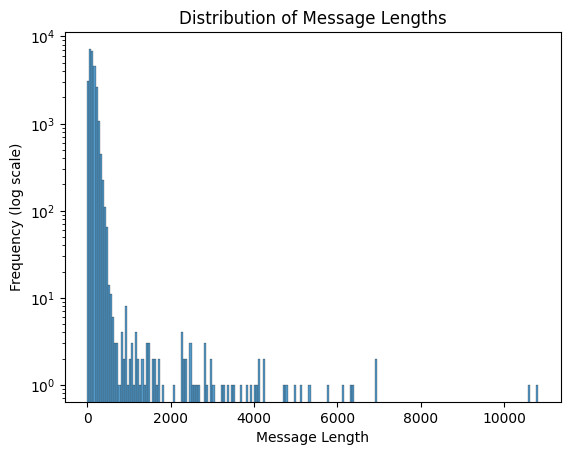

In [26]:
#Length of messages
df['message_length'] = df['message'].apply(len)

sns.histplot(df['message_length'], binwidth=50)
plt.yscale('log')
plt.xlabel('Message Length')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Message Lengths')
plt.show()

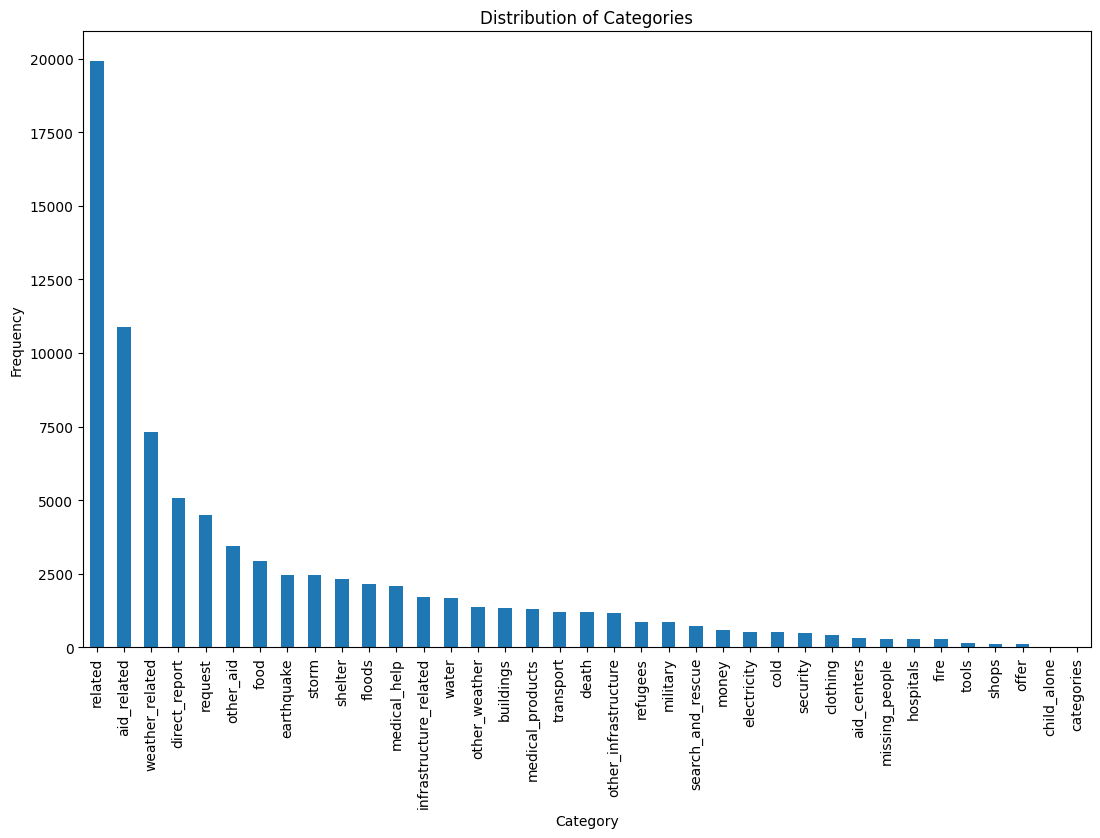

In [27]:
categories = df_out.columns[-37:]
category_counts = df_out[categories].sum().sort_values(ascending=False)
plt.figure(figsize=(13, 8))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()

In [28]:
df.head(5)

,id,message,original,genre,locations,message_length
0,2,weather update - a cold front from cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66
1,7,is the hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,NaN,39
2,8,looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31
3,9,un reports leogane 80-90 destroyed. only hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100
4,12,"says: west side of haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63


Removing all the stopwords

In [29]:
nltk.download('stopwords')
nltk.download('punkt')

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

# Example usage:
for index in df.index:
  text = df.at[index, 'message']
  df.at[index, 'message'] = remove_stopwords(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Removing misspelled words

In [30]:
spell = SpellChecker()

def correct_spelling(text):
    # Split the text into words
    words = text.split()
    # Correct spelling for each word
    corrected_words = [spell.candidates(word).pop() if word in spell else word for word in words]
    # Join the corrected words back into a single string
    return ' '.join(corrected_words)

# Apply the correction function to each message in the DataFrame
df['message'] = df['message'].apply(correct_spelling)

In [31]:
df.head(5)

,id,message,original,genre,locations,message_length
0,2,weather update - cold front cuba could pass haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66
1,7,hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39
2,8,looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31
3,9,un reports leogane 80-90 destroyed . hospital ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100
4,12,"says : west side haiti , rest country today to...",facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63


Removing common words of English language like punctuation and short words

In [32]:
# Function to clean the text
def clean_text(text):
    # Remove unwanted characters (e.g., punctuation)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove short words (length < 2)
    text = ' '.join([word for word in text.split() if len(word) > 1])
    return text

# Apply cleaning function
df['message'] = df['message'].apply(clean_text)

In [33]:
df.head(5)

,id,message,original,genre,locations,message_length
0,2,weather update cold front cuba could pass haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66
1,7,hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39
2,8,looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31
3,9,un reports leogane 8090 destroyed hospital st ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100
4,12,says west side haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63


<ipython-input-34-ea64de5857a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis')


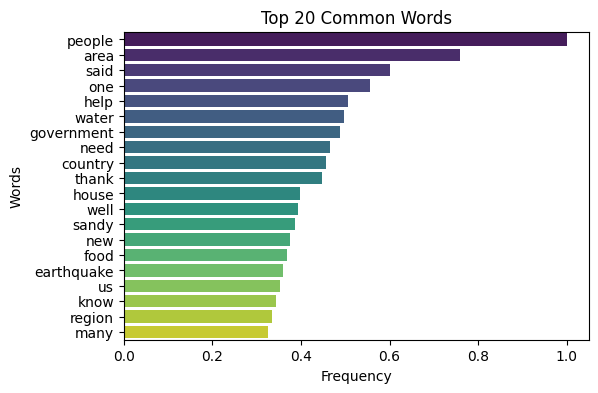

In [34]:
all_messages = ' '.join(df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)
word_freq = wordcloud.words_

df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort DataFrame by frequency
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Common Words')
plt.show()


In [35]:
df.shape

(26248, 6)

In [36]:
df_out.shape

(26248, 38)

Merging the two datsets into one

In [37]:
result = pd.concat([df, df_out.iloc[:,1:]], axis=1, join="inner")

In [38]:
result.head(5)

,id,message,original,genre,locations,message_length,categories,related,request,offer,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,weather update cold front cuba could pass haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,hurricane,Cyclone nan fini osinon li pa fini,direct,NaN,39,None,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,NaN,31,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,un reports leogane 8090 destroyed hospital st ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,NaN,100,None,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,says west side haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63,None,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
result.columns

Index(['id', 'message', 'original', 'genre', 'locations', 'message_length',
       'categories', 'related', 'request', 'offer', 'aid_related',
       'medical_help', 'medical_products', 'search_and_rescue', 'security',
       'military', 'child_alone', 'water', 'food', 'shelter', 'clothing',
       'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

Merging all the rows having same ids




In [40]:
output_columns = [
    'related', 'request', 'offer', 'aid_related', 'medical_help',
    'medical_products', 'search_and_rescue', 'security', 'military',
    'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
    'missing_people', 'refugees', 'death', 'other_aid',
    'infrastructure_related', 'transport', 'buildings', 'electricity',
    'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
    'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
    'other_weather', 'direct_report'
]
result = result.groupby('id').agg({
    'message': ' '.join,
    'original': 'first',
    'genre': 'first',
    'locations': 'first',
    'message_length':'first',
    **{col: 'max' for col in output_columns}
}).reset_index()

In [41]:
result[result['related']==0].shape

(6300, 42)

In [42]:
result.shape

(26180, 42)

Determining the Urgency of the message using a list of 500 words related to disaster SOS

In [43]:
# These words were generated by gpt model as urgent words
urgency_words = [
    'important', 'crucial', 'critical', 'urgent', 'essential', 'vital', 'imperative', 'necessary', 'pivotal',
    'significant', 'key', 'pressing', 'ask', 'plead', 'beg', 'appeal', 'implore', 'entreat', 'solicit',
    'demand', 'need', 'require', 'seek', 'petition', 'provide', 'give', 'supply', 'deliver', 'extend',
    'volunteer', 'propose', 'contribute', 'grant', 'furnish', 'present', 'yield', 'support', 'assist', 'help',
    'aid', 'relieve', 'serve', 'rescue', 'sustain', 'bolster', 'nurture', 'mediate', 'alleviate', 'heal',
    'treat', 'remedy', 'cure', 'restore', 'recover', 'administer', 'dispense', 'prescribe', 'diagnose', 'search',
    'rescue', 'locate', 'recover', 'find', 'secure', 'save', 'protect', 'guard', 'shield', 'defend',
    'safeguard', 'patrol', 'fortify', 'reinforce', 'deploy', 'mobilize', 'station', 'command', 'protect',
    'guard', 'shield', 'evacuate', 'evacuation', 'water', 'drink', 'hydration', 'irrigate', 'food', 'eat',
    'nutrition', 'nourishment', 'rations', 'supply', 'shelter', 'housing', 'accommodation', 'refuge',
    'clothing', 'apparel', 'garments', 'attire', 'wear', 'money', 'funds', 'finance', 'capital', 'missing',
    'lost', 'disappeared', 'unfound', 'search', 'rescue', 'locate', 'find', 'refugees', 'displaced',
    'exiled', 'death', 'fatality', 'casualty', 'deceased', 'mortality', 'other_aid', 'support', 'help',
    'assist', 'alleviate', 'infrastructure', 'transport', 'road', 'bridge', 'path', 'buildings', 'construction',
    'architecture', 'structure', 'electricity', 'power', 'energy', 'light', 'tools', 'equipment', 'instruments',
    'devices', 'hospitals', 'medical', 'clinic', 'healthcare', 'shops', 'stores', 'retail', 'market', 'aid_centers',
    'assistance', 'support', 'help', 'other_infrastructure', 'weather', 'climate', 'floods', 'deluge',
    'inundation', 'storm', 'tempest', 'fire', 'blaze', 'inferno', 'earthquake', 'tremor', 'seismic', 'cold',
    'chill', 'freeze', 'frost', 'other_weather', 'direct_report', 'alert', 'notification', 'communication',
    'warning', 'report', 'notification', 'call', 'signal', 'message', 'dispatch', 'transmit', 'relay', 'broadcast',
    'strained', 'life-saving', 'storm', 'instant', 'hazardous', 'prescribe', 'conflict', 'brawl', 'administer',
    'indispensable', 'quickly', 'security', 'extend', 'secure', 'other_weather', 'call', 'need', 'worry',
    'other_aid', 'struggle', 'lost', 'save', 'mortality', 'hydration', 'attire', 'funds', 'clinic', 'jeopardy',
    'life-threatening', 'war', 'present', 'sustain', 'structure', 'must', 'frost', 'risky', 'harm', 'serious',
    'shield', 'pressing', 'unforeseen', 'emergency', 'rescue', 'threat', 'insistent', 'ask', 'demand', 'furnish',
    'hospitals', 'panic', 'unfound', 'alarm', 'vital', 'necessity', 'architecture', 'crucial', 'yield',
    'direct_report', 'failure', 'support', 'safety', 'reinforce', 'assist', 'death', 'demanding', 'petition',
    'casualty', 'irrigate', 'deluge', 'fire', 'rapidly', 'imperative', 'volunteer', 'eat', 'entreat', 'chill',
    'timely', 'apparel', 'high-risk', 'explosion', 'tempest', 'breakneck', 'distress', 'diagnose', 'contribute',
    'grievous', 'notification', 'compelling', 'earthquake', 'shops', 'jeopardize', 'aid', 'accident', 'pivotal',
    'instantaneous', 'violence', 'water', 'hectic', 'garments', 'deceased', 'instruments', 'signal', 'blaze',
    'help', 'dire', 'disaster', 'emergent', 'life-or-death', 'fatality', 'construction', 'protect', 'stores',
    'seismic', 'message', 'path', 'hurried', 'mobilize', 'acute', 'necessary', 'obligation', 'severe', 'refuge',
    'bridge', 'dispense', 'stressed', 'cold', 'medical', 'overdue', 'hurry', 'flood', 'implore', 'immediate',
    'solicit', 'deliver', 'now', 'mediate', 'precarious', 'transport', 'aid_centers', 'report', 'restore',
    'relieve', 'serve', 'road', 'brisk', 'accelerate', 'attack', 'invasion', 'grant', 'assault', 'defend', 'find',
    'electricity', 'response', 'active', 'wear', 'buildings', 'unavoidable', 'collapse', 'key', 'catastrophe',
    'inundation', 'assistance', 'communication', 'housing', 'frantic', 'cure', 'time-sensitive', 'guard',
    'evacuation', 'warning', 'nourishment', 'imminent', 'pressured', 'station', 'accommodation', 'immediately',
    'essential', 'desperate', 'clothing', 'alert', 'transmit', 'high-stakes', 'provide', 'rush', 'frenzied',
    'significant', 'seek', 'displaced', 'grave', 'relay', 'fast', 'speedy', 'burst', 'shelter', 'high-priority',
    'plead', 'freeze', 'menacing', 'capital', 'remedy', 'expedite', 'command', 'combat', 'appeal', 'nutrition',
    'finance', 'peril', 'decisive', 'alleviate', 'swift', 'preparedness', 'unstable', 'recover', 'infrastructure',
    'power', 'equipment', 'drink', 'heal', 'breakdown', 'inevitable', 'money', 'supply', 'dispatch', 'priority',
    'fateful', 'requirement', 'battling', 'urgent', 'give', 'deploy', 'patrol', 'exiled', 'alarming', 'hasty',
    'hazard', 'inferno', 'food', 'propose', 'missing', 'climate', 'other_infrastructure', 'evacuate', 'alertness',
    'ASAP', 'abrupt', 'compulsion', 'prompt', 'require', 'rapid', 'treat', 'tools', 'retail', 'outbreak', 'risk',
    'briskly', 'healthcare', 'refugees', 'search', 'important', 'rations', 'flurry', 'devices', 'disappeared',
    'relief', 'tremor', 'perilous', 'energy', 'injury', 'fight', 'crisis', 'damage', 'exigent', 'urgency',
    'safeguard', 'market', 'exigency', 'weather', 'floods', 'fortify', 'critical', 'danger', 'swiftly',
    'irreplaceable', 'nurture', 'locate', 'beg', 'last-minute', 'quick', 'bolster', 'light', 'broadcast',
    'alertness', 'ambulance', 'anxiety', 'backup', 'bunker', 'call-to-action', 'checkpoint', 'collaborate',
    'contain', 'control', 'coordination', 'crisis-mode', 'deploy-resources', 'emergency-kit', 'evacuation-plan',
    'extreme', 'fire-fighting', 'first-response', 'gear', 'guide', 'hazard-awareness', 'incident-response',
    'intensive-care', 'level-one', 'level-two', 'level-three', 'logistics', 'monitoring', 'operations',
    'panic-mode', 'preventive', 'protective', 'quarantine-zone', 'rapid-response-team', 'rescue-operation',
    'resilience', 'risk-assessment', 'safety-check', 'search-operation', 'secure-zone', 'shelter-in-place',]

urgency_pattern = re.compile(r'\b(?:' + '|'.join(urgency_words) + r')\b', re.IGNORECASE)

def check_urgency_level(message):
    # Find all urgency words in the message
    matches = urgency_pattern.findall(message)

    # Determine urgency level based on the number of matches
    if len(matches) >= 3:
        return "High Urgency"
    elif len(matches) == 2:
        return "Medium Urgency"
    elif len(matches) == 1:
        return "Low Urgency"
    else:
        return "No Urgency"

In [44]:
for index in result.index:
  text = result.at[index, 'message']
  result.at[index, 'urgency_level_0'] = check_urgency_level(text)

In [45]:
print(f"High urgency: {result[result['urgency_level_0']=='High Urgency'].shape[0]}")
print(f"Medium urgency: {result[result['urgency_level_0']=='Medium Urgency'].shape[0]}")
print(f"Low urgency: {result[result['urgency_level_0']=='Low Urgency'].shape[0]}")
print(f"No urgency: {result[result['urgency_level_0']=='No Urgency'].shape[0]}")

High urgency: 4083
Medium urgency: 4651
Low urgency: 8247
No urgency: 9199


In [46]:
result.shape

(26180, 43)

In [47]:
result.iloc[:,-37:].columns

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report', 'urgency_level_0'],
      dtype='object')

In [48]:
result.shape

(26180, 43)

The messages that have these following categories and are direct are considered urgent by default

In [49]:
result['urgency_level_0'][
    ((result['medical_help'] == 1) |
    (result['search_and_rescue'] == 1) |
    (result['security'] == 1) |
    (result['water'] == 1) |
    (result['food'] == 1) |
    (result['shelter'] == 1) |
    (result['missing_people'] == 1) |
    (result['death'] == 1) |
    (result['floods'] == 1) |
    (result['storm'] == 1) |
    (result['fire'] == 1) |
    (result['earthquake'] == 1)) &
    (result['genre']=="direct")
]="High Urgency"

<ipython-input-49-8555cc6fed29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['urgency_level_0'][


In [50]:
print(f"High urgency: {result[result['urgency_level_0']=='High Urgency'].shape[0]}")
print(f"Medium urgency: {result[result['urgency_level_0']=='Medium Urgency'].shape[0]}")
print(f"Low urgency: {result[result['urgency_level_0']=='Low Urgency'].shape[0]}")
print(f"No urgency: {result[result['urgency_level_0']=='No Urgency'].shape[0]}")

High urgency: 6908
Medium urgency: 3695
Low urgency: 7041
No urgency: 8536


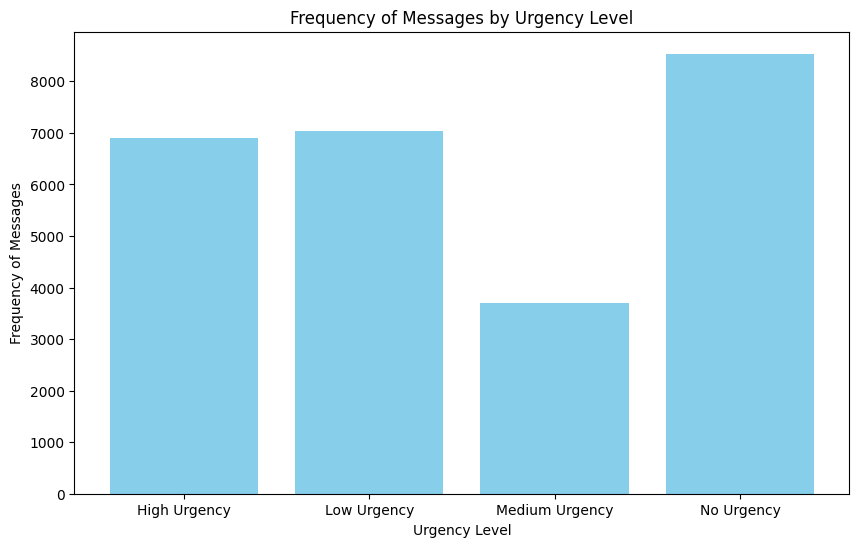

In [76]:
urgency_frequency = result['urgency_level_0'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(urgency_frequency.index, urgency_frequency.values, color='skyblue')
plt.xlabel('Urgency Level')
plt.ylabel('Frequency of Messages')
plt.title('Frequency of Messages by Urgency Level')
plt.xticks(urgency_frequency.index)
plt.show()

Making Plots of common words for each individual category

In [51]:
lst

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


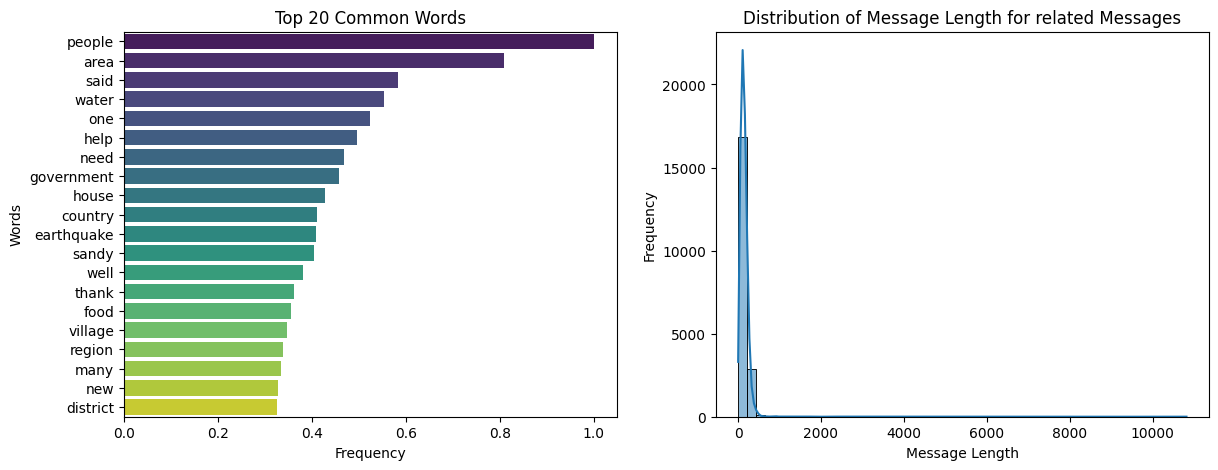

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


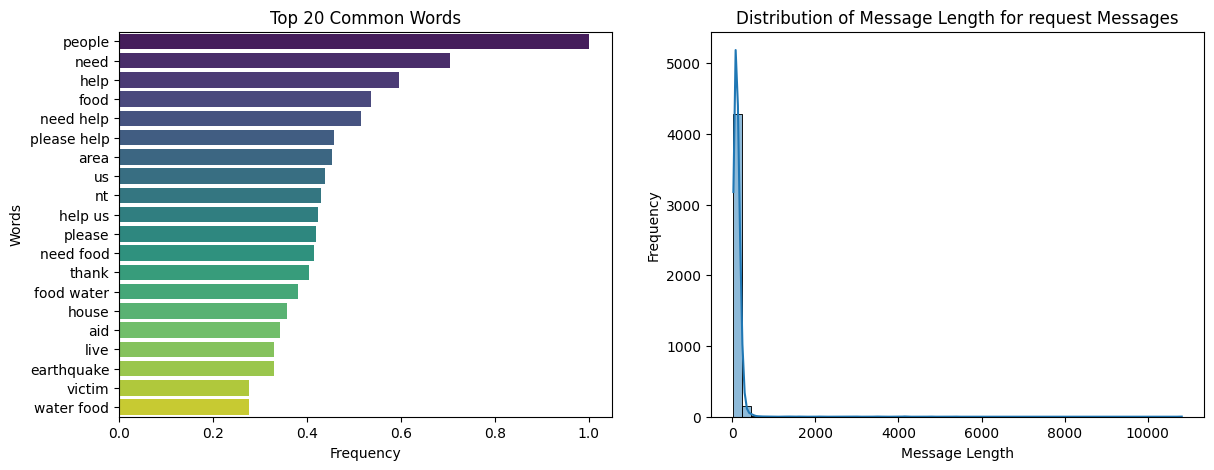

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


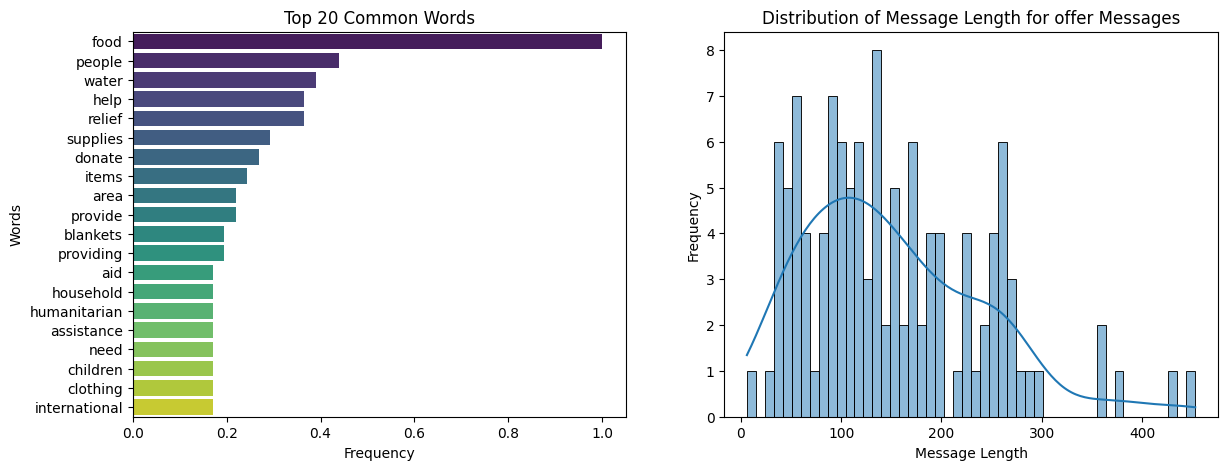

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


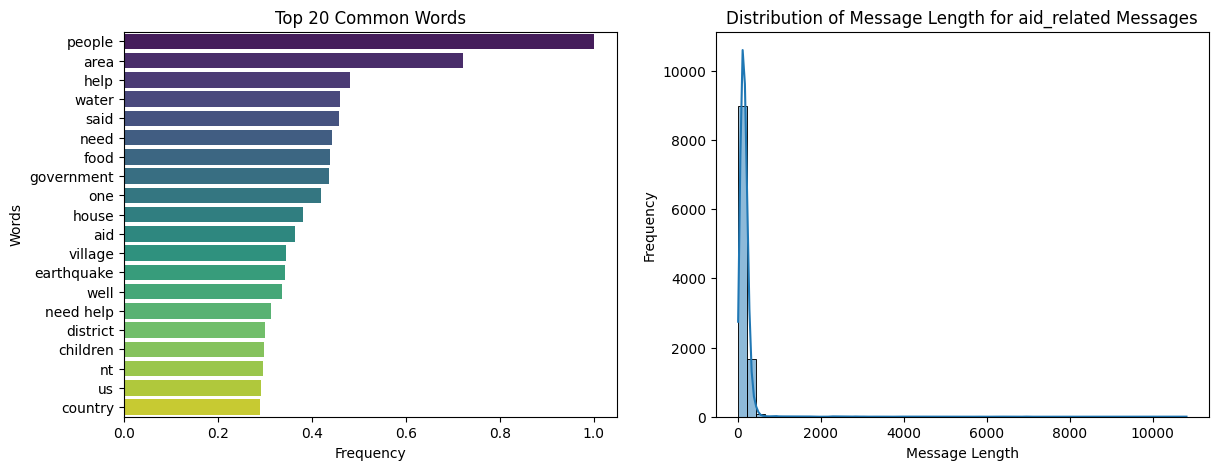

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


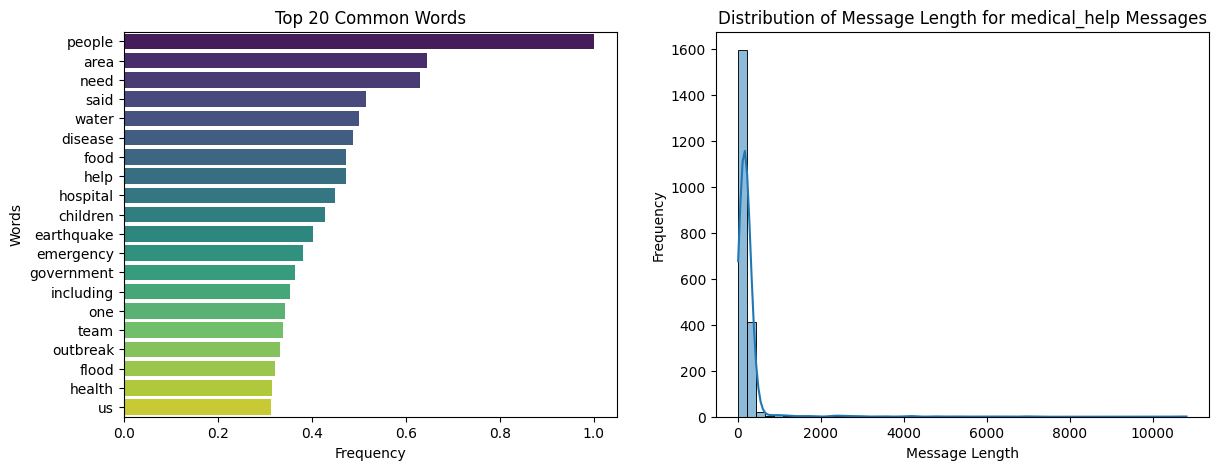

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


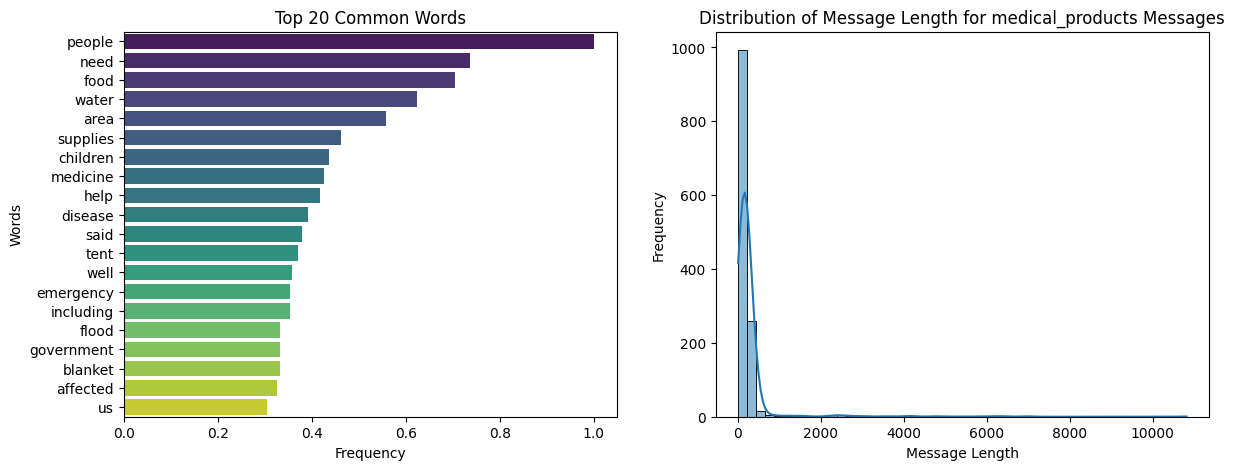

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


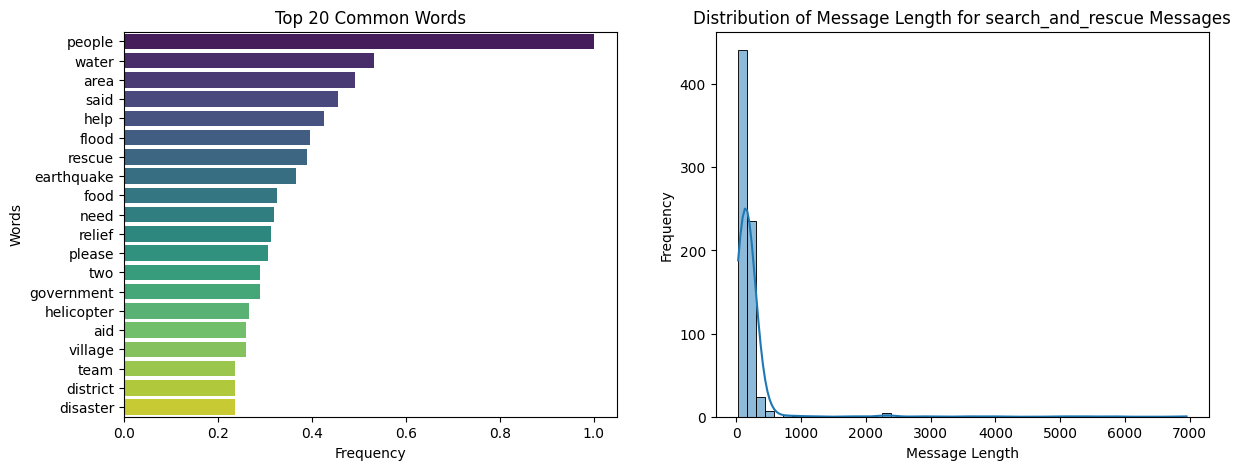

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


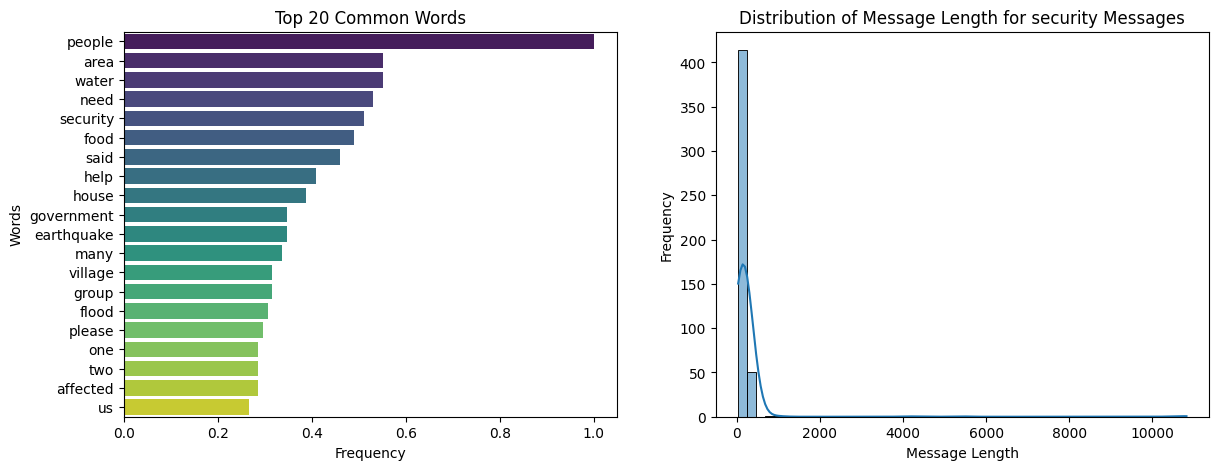

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


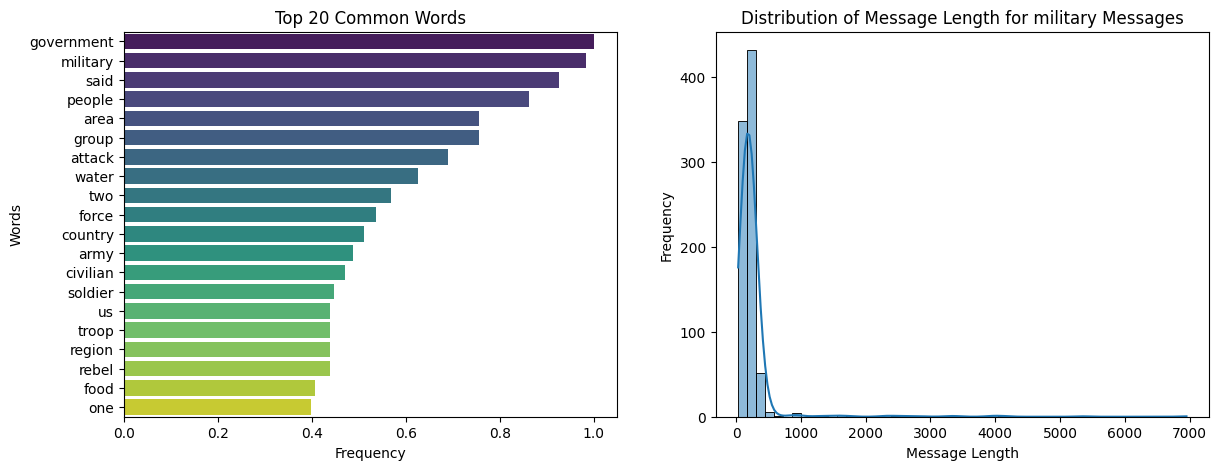


 
 
 
 There were no cases for child_alone 
 
 
 



<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


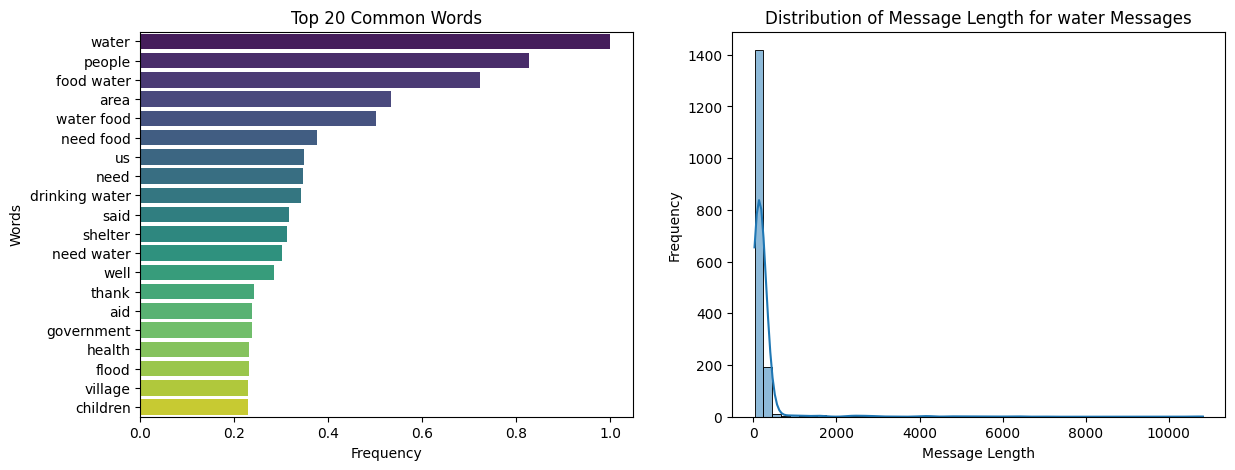

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


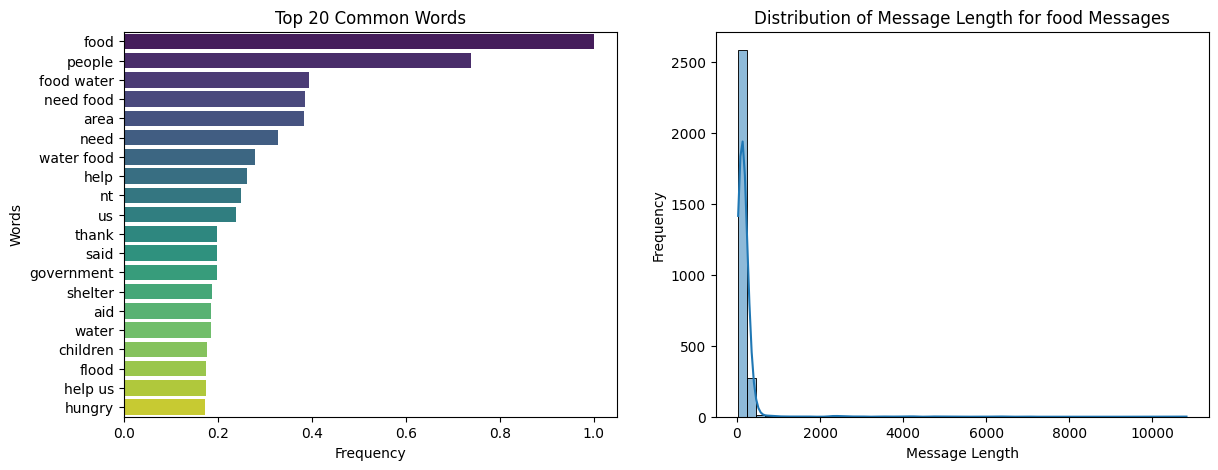

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


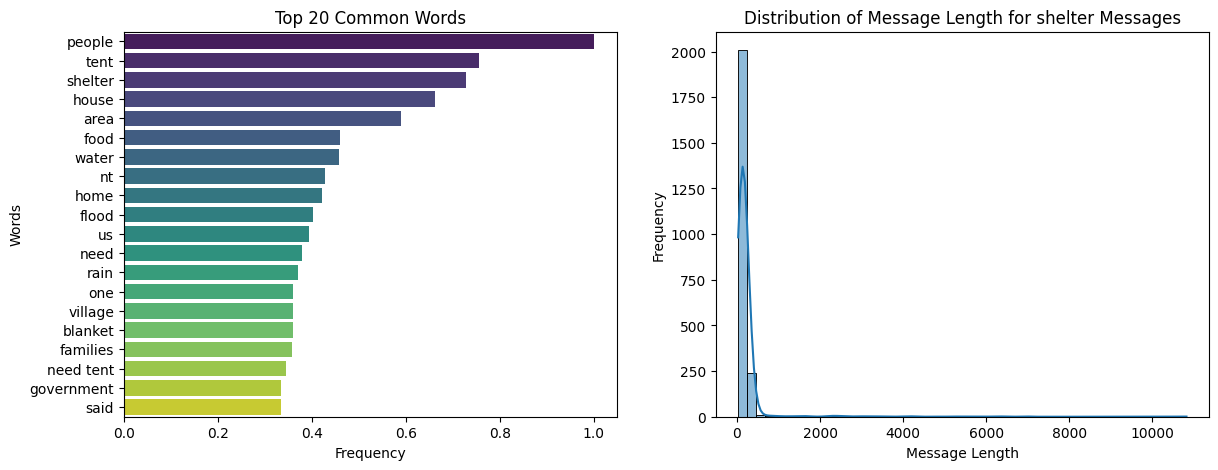

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


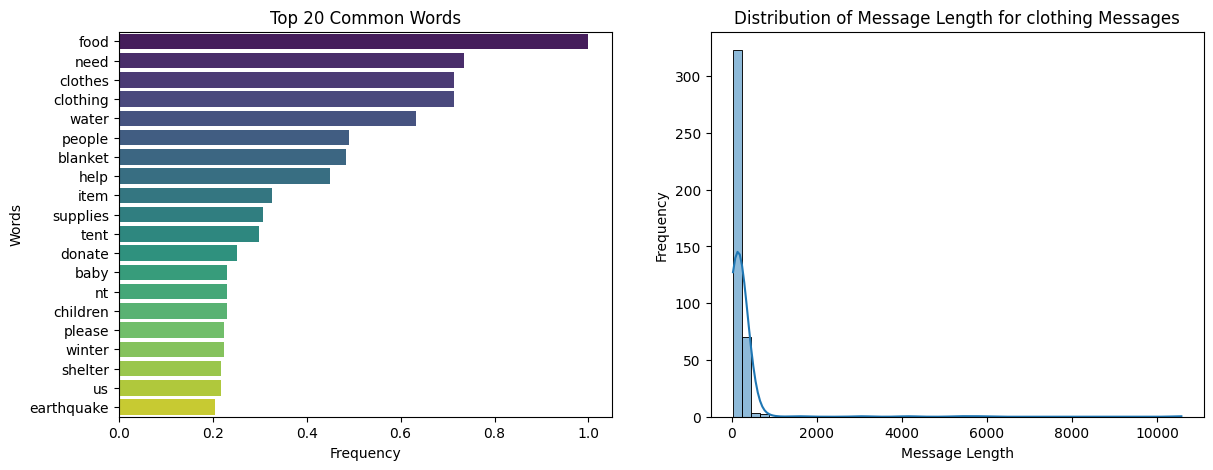

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


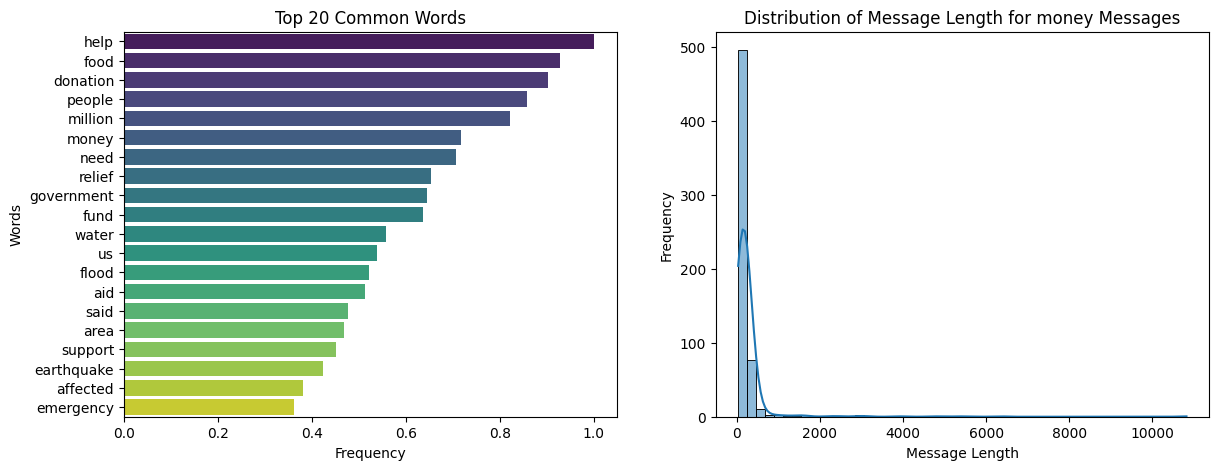

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


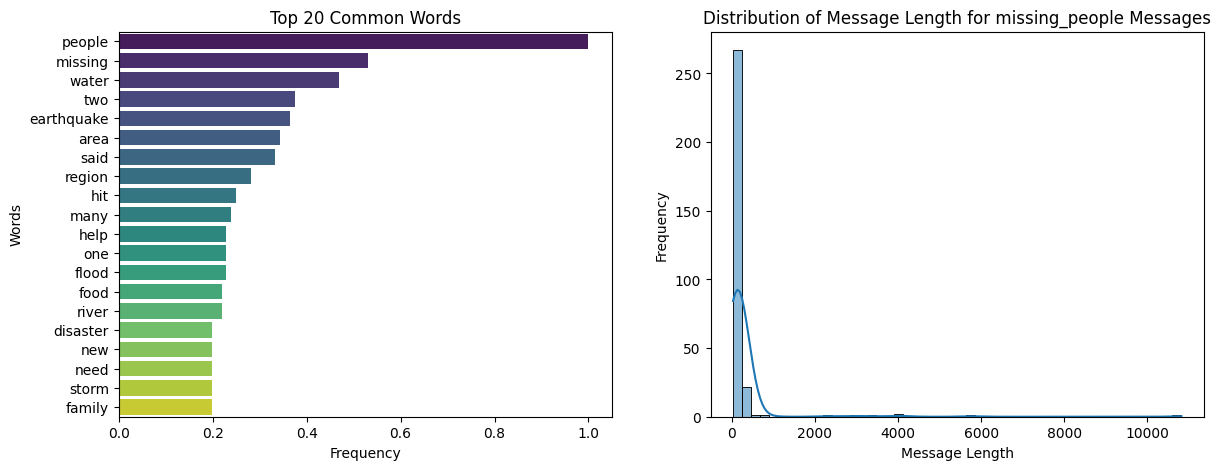

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


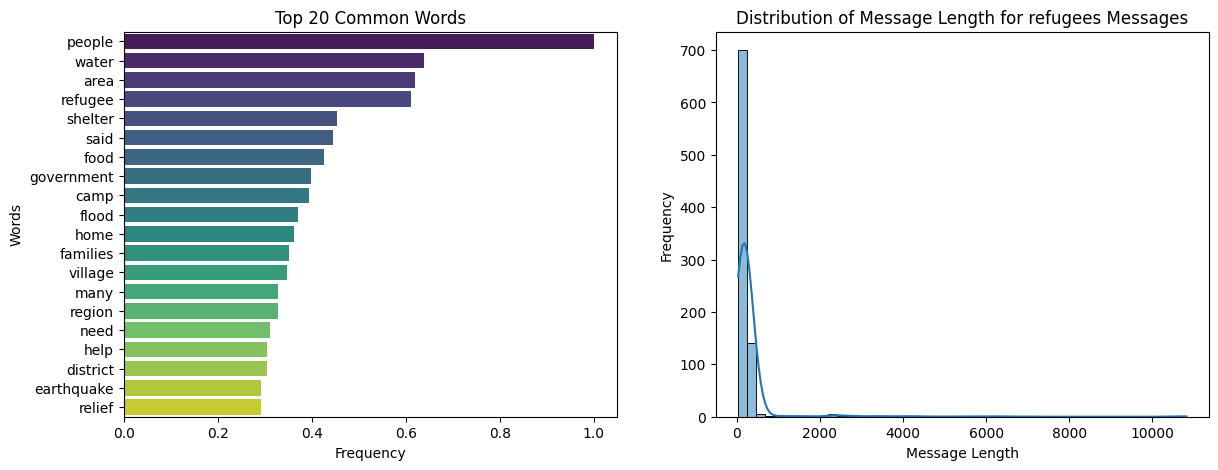

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


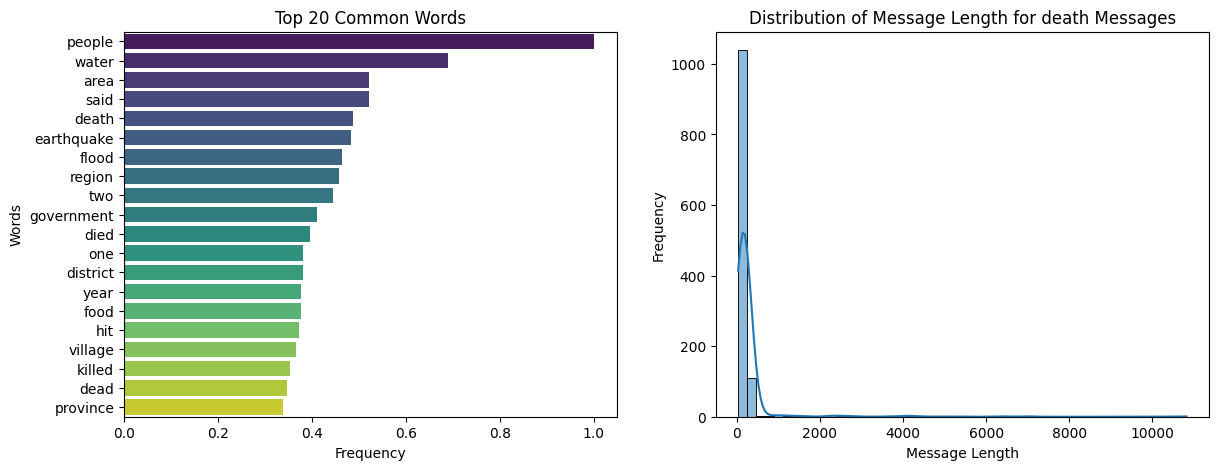

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


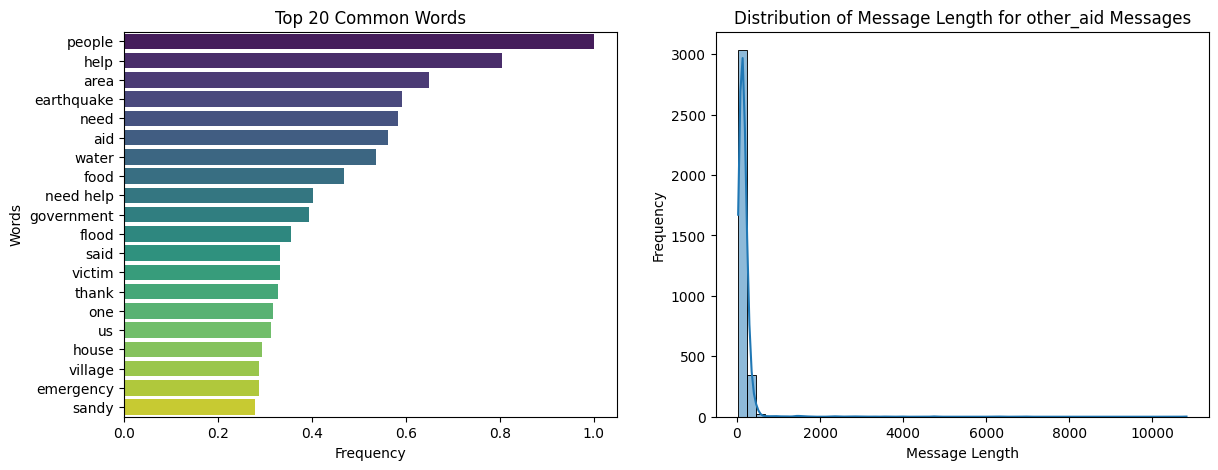

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


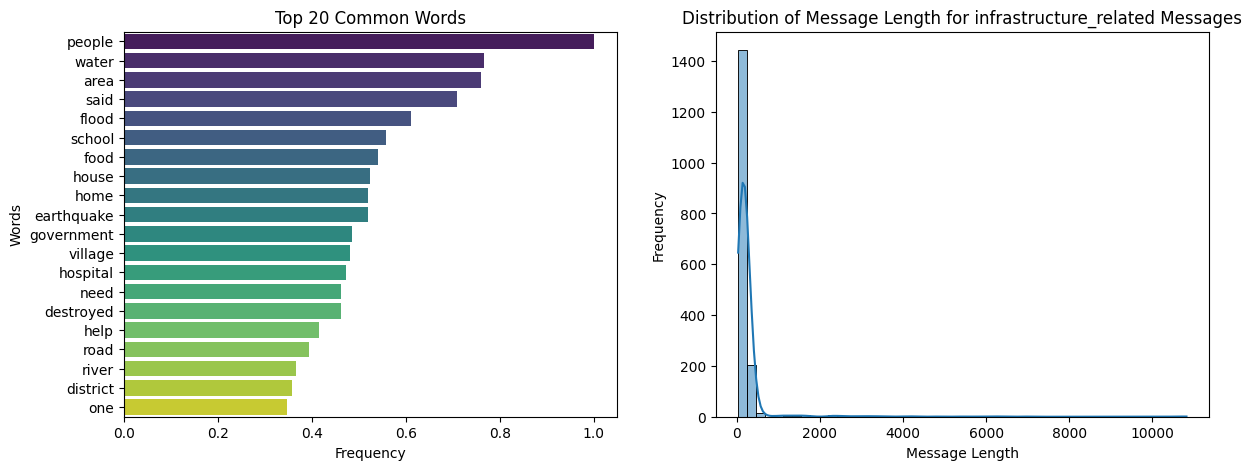

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


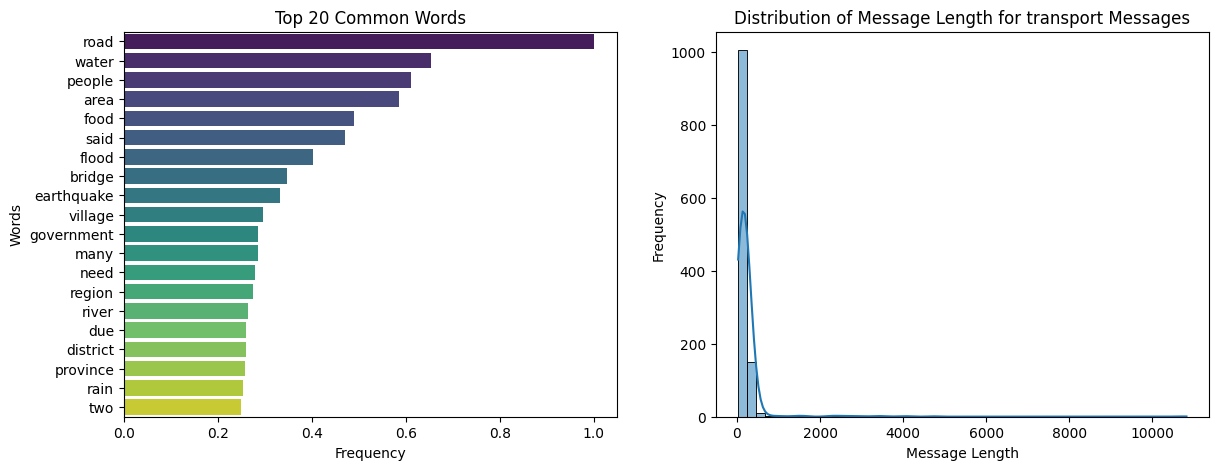

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


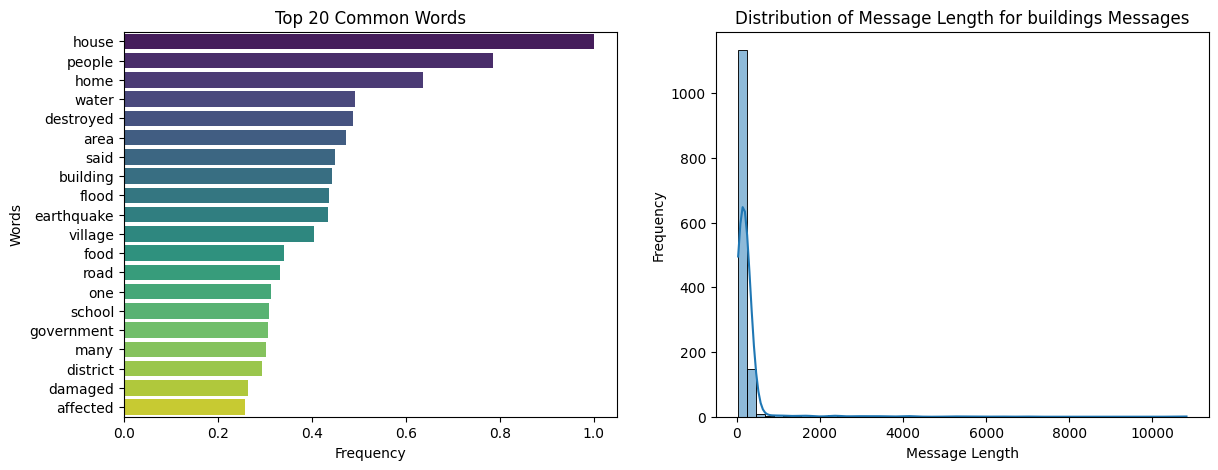

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


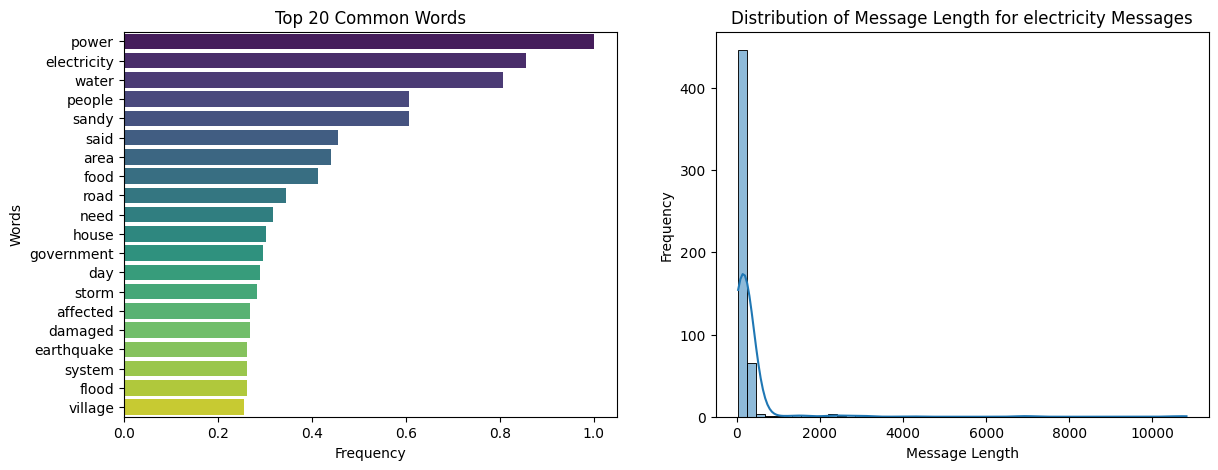

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


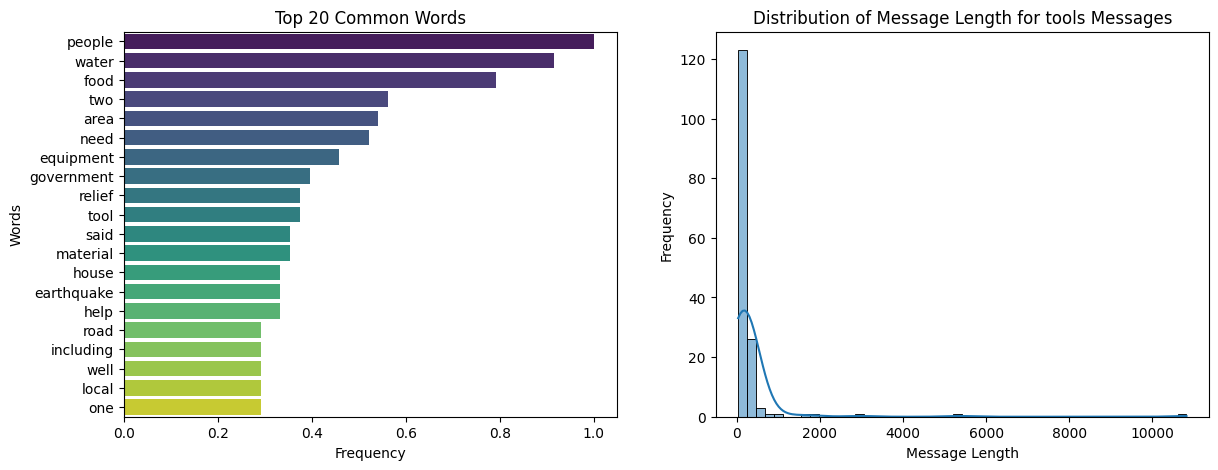

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


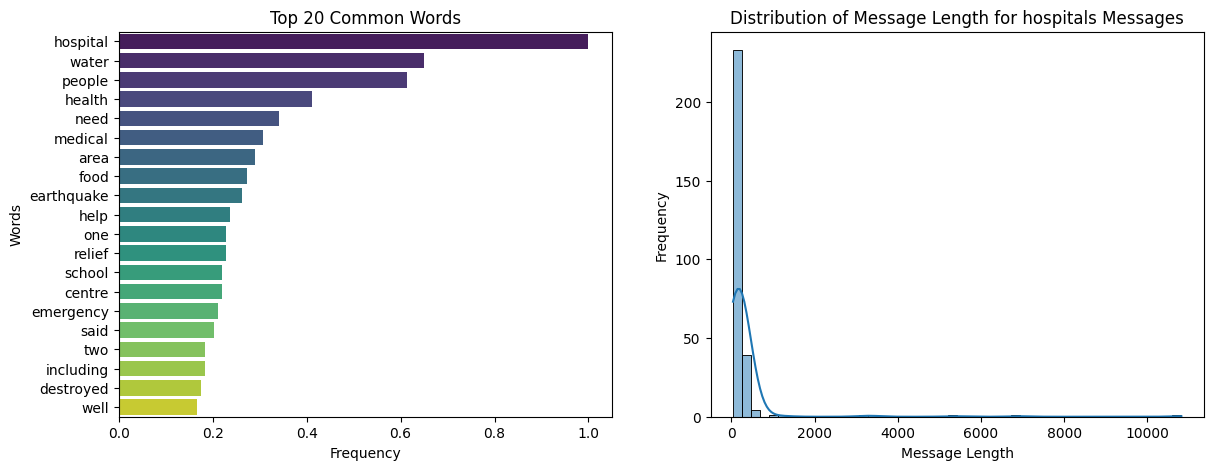

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


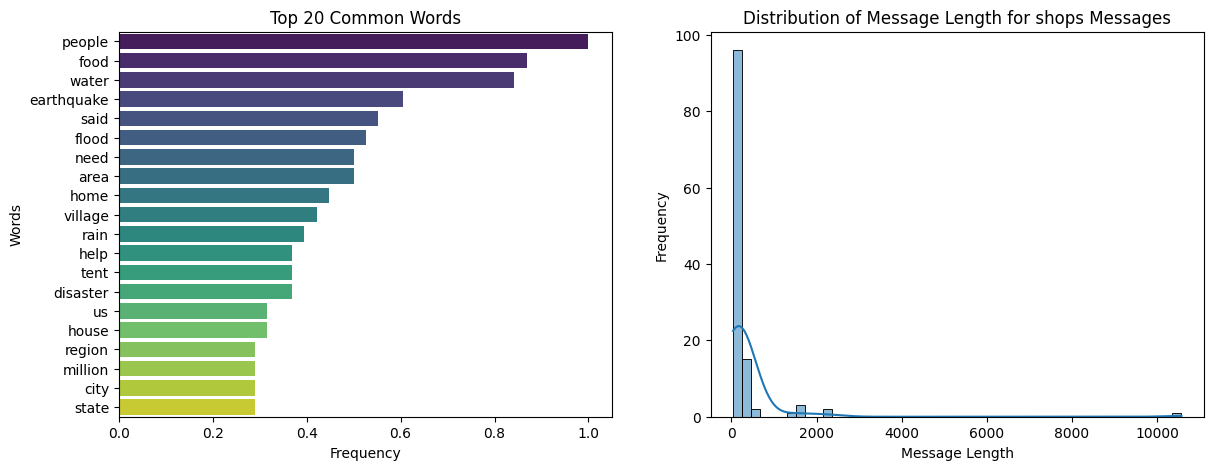

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


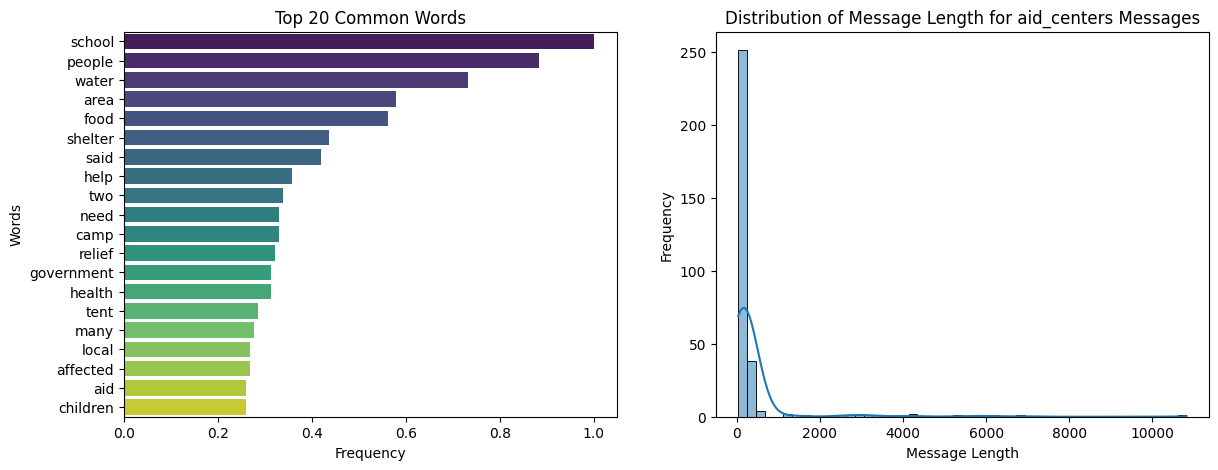

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


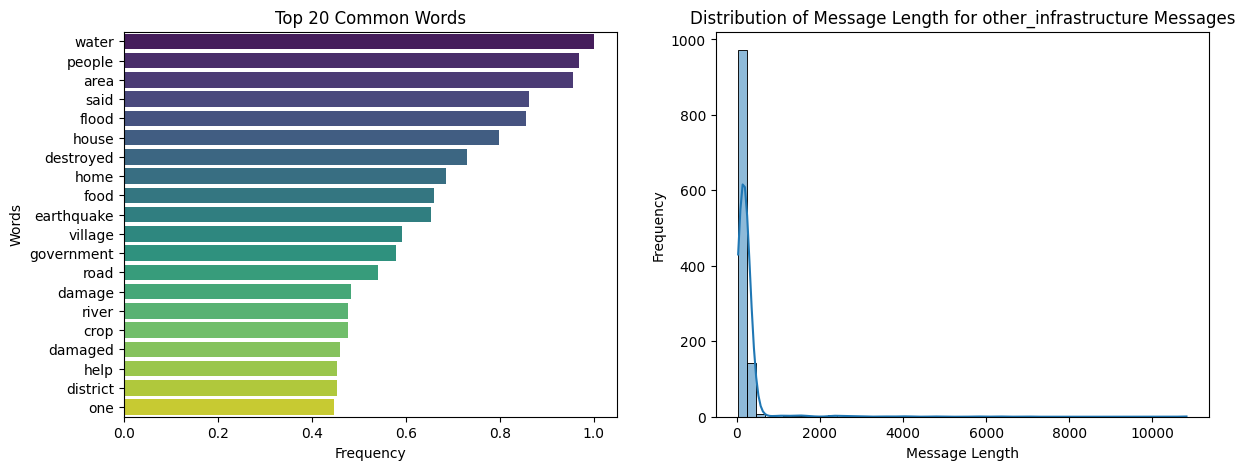

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


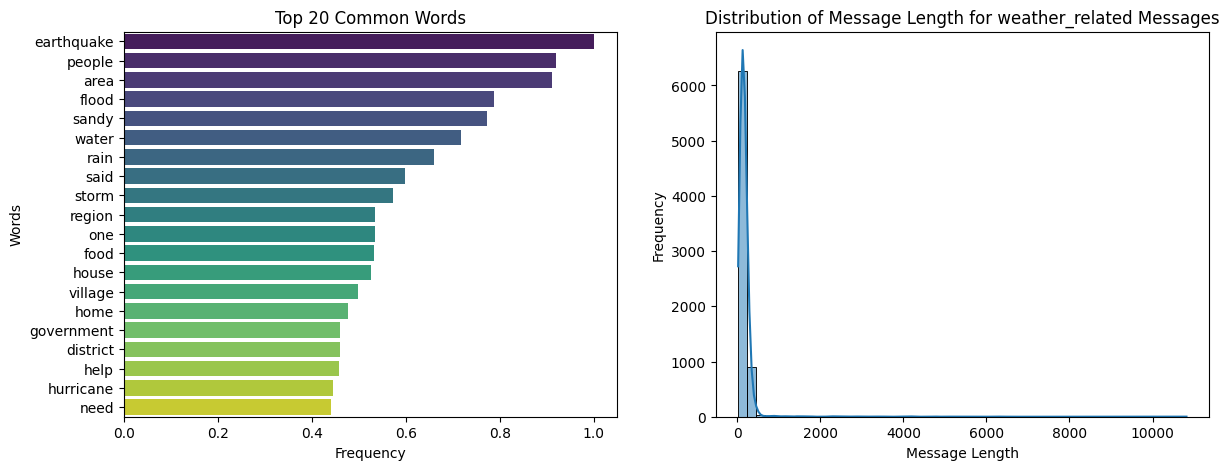

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


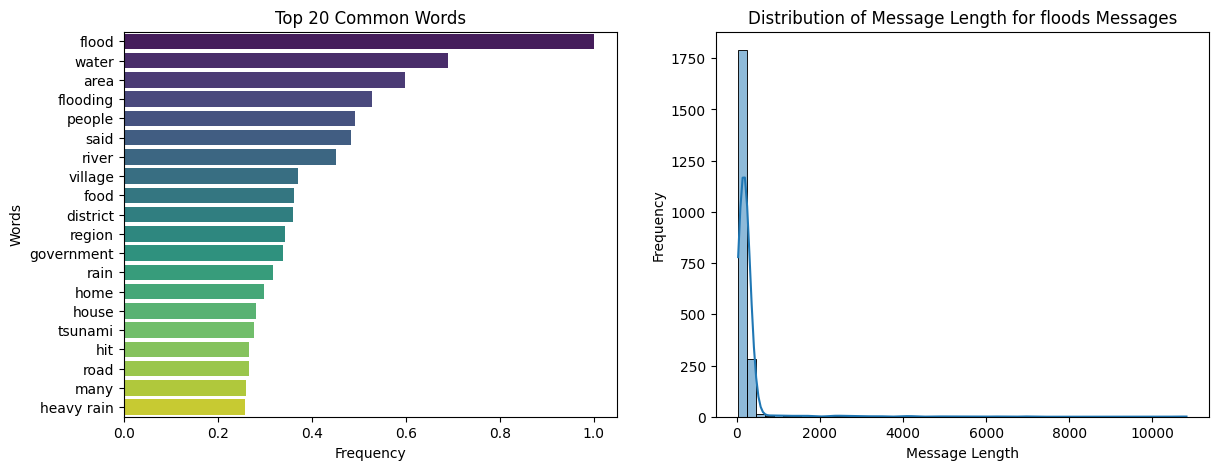

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


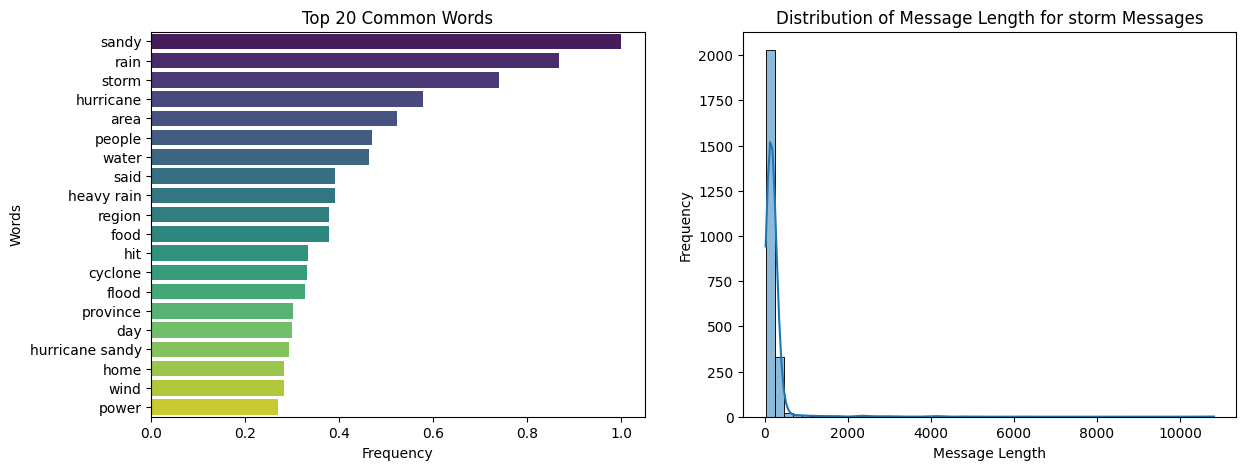

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


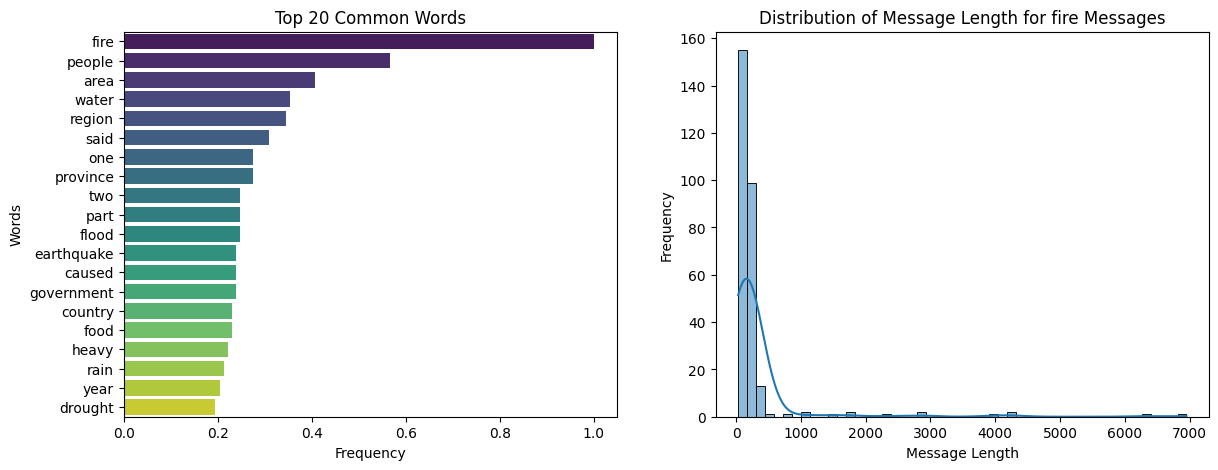

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


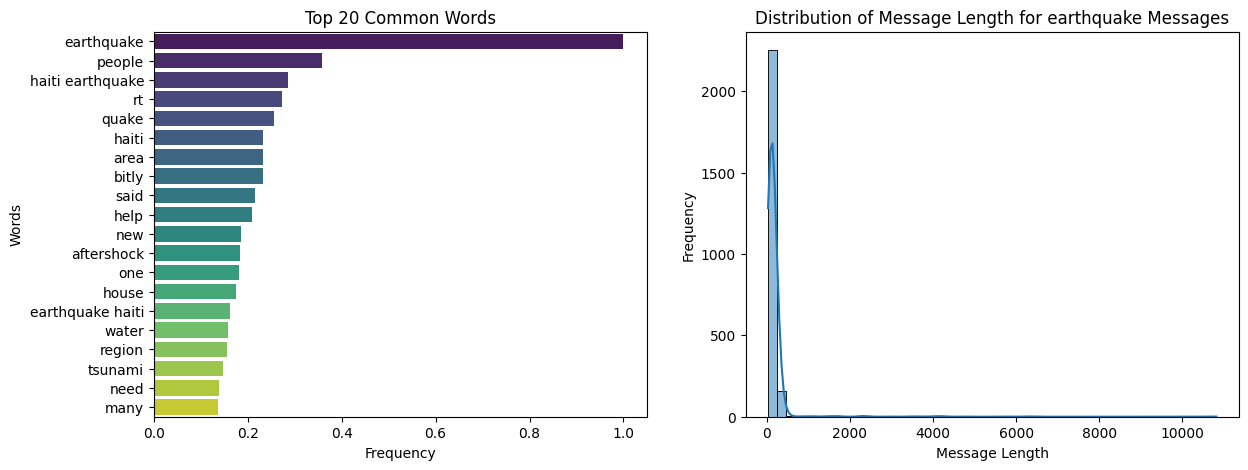

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


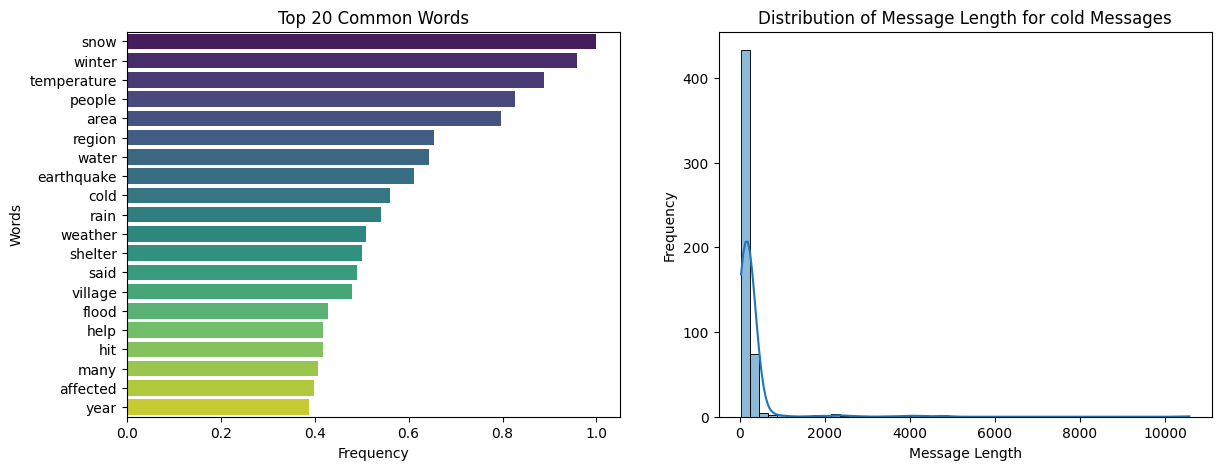

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


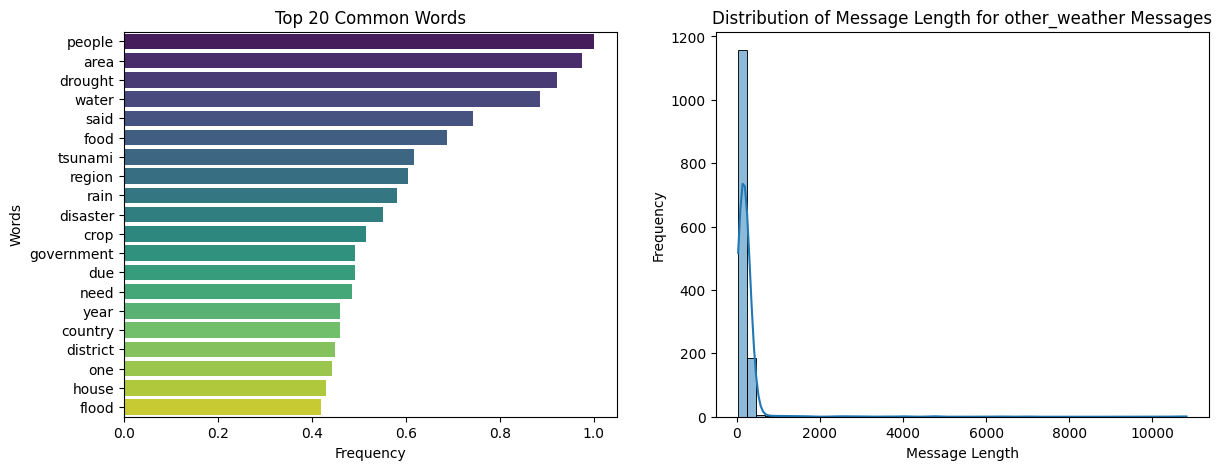

<ipython-input-52-7f0378c07dbe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])


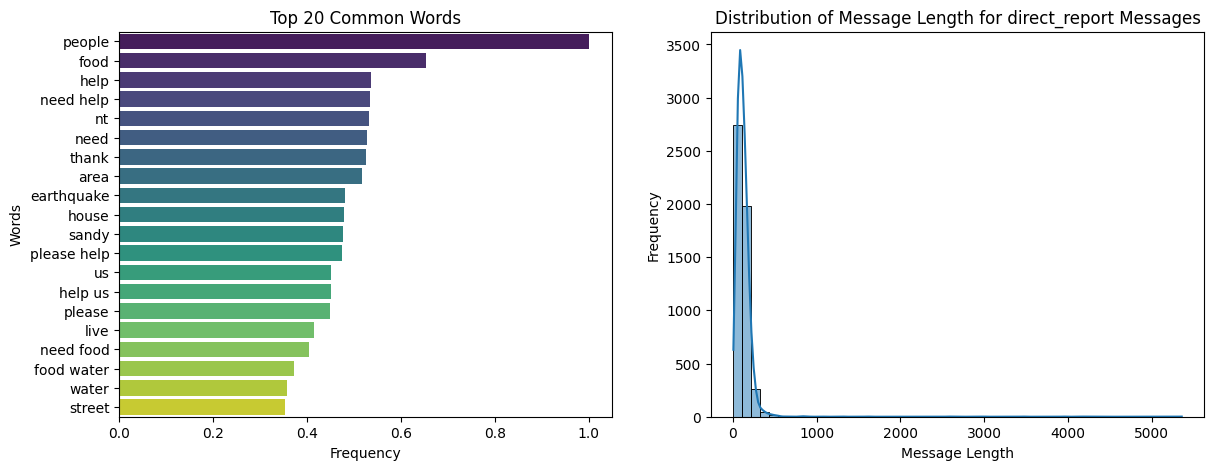

In [52]:
for element in lst:
  element_df = result[result[element]==1]

  # Word cloud for 'type of request' messages
  element_messages = ' '.join(element_df['message'])
  try:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(element_messages)
    word_freq = wordcloud.words_
  except:
    print(f"\n \n \n \n There were no cases for {element} \n \n \n \n")
    continue

  # all_messages = ' '.join(df['message'])

  df_word_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

  # Sort DataFrame by frequency
  df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

  fig, axs = plt.subplots(1, 2, figsize=(14, 5))

  sns.barplot(data=df_word_freq.head(20), y='Word', x='Frequency', palette='viridis', ax=axs[0])
  axs[0].set_xlabel('Frequency')
  axs[0].set_ylabel('Words')
  axs[0].set_title('Top 20 Common Words')


  # Message length distribution for 'medical request' category
  sns.histplot(element_df['message_length'], bins=50, kde=True, ax=axs[1])
  axs[1].set_title(f'Distribution of Message Length for {element} Messages')
  axs[1].set_xlabel('Message Length')
  axs[1].set_ylabel('Frequency')

  plt.show()

In [53]:
result.head(5)

,id,message,original,genre,locations,message_length,related,request,offer,aid_related,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,urgency_level_0
0,2,weather update cold front cuba could pass haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,"['Cuba', 'Haiti']",66,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium Urgency
1,7,hurricane,Cyclone nan fini osinon li pa fini,direct,None,39,1,0,0,1,...,0,1,0,1,0,0,0,0,0,High Urgency
2,8,looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,None,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,No Urgency
3,9,un reports leogane 8090 destroyed hospital st ...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,None,100,1,1,0,1,...,0,0,0,0,0,0,0,0,0,No Urgency
4,12,says west side haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,['Haiti'],63,1,0,0,0,...,0,0,0,0,0,0,0,0,0,No Urgency


In [55]:
result[(result.iloc[:,-37:]).isnull().any(axis=1)].count()

,0
id,0
message,0
original,0
genre,0
locations,0
message_length,0
related,0
request,0
offer,0
aid_related,0


In [57]:
result.shape

(26180, 43)

In [58]:
print(result['id'].duplicated().sum())

0



## **MODEL TRAINING**

In [59]:
result.iloc[:,-37:-1].columns

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [60]:
x=result.iloc[:,1]
y=result.iloc[:,-37:-1]
x.head(5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

In [66]:
model = MultiOutputClassifier(xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200
))
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:57:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:58:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:58:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:58:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [73]:
model = MultiOutputClassifier(xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200
))
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:59:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [74]:
y_pred = model.predict(X_test_tfidf)

# Generate classification report for each category
for i, column in enumerate(y.columns):
    print(f"Category: {column}")
    print(classification_report(y_test[column], y_pred[:, i]))

Category: related
              precision    recall  f1-score   support

           0       0.70      0.42      0.53      1290
           1       0.83      0.94      0.88      3946

    accuracy                           0.81      5236
   macro avg       0.77      0.68      0.71      5236
weighted avg       0.80      0.81      0.80      5236

Category: request
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4311
           1       0.77      0.55      0.64       925

    accuracy                           0.89      5236
   macro avg       0.84      0.76      0.79      5236
weighted avg       0.88      0.89      0.88      5236

Category: offer
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5208
           1       0.33      0.04      0.06        28

    accuracy                           0.99      5236
   macro avg       0.66      0.52      0.53      5236
weighted avg       0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
